<a href="https://colab.research.google.com/github/KieranPereira/Traffic-Sign-Detection/blob/main/Road_sign_Data_Formatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Installations

In [1]:
!pip install pandas
import os
import shutil
import cv2
import json
import pandas as pd
from PIL import Image
from functools import *
import json
import time
import yaml
import zipfile
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import csv
import numpy as np
from google.colab.patches import cv2_imshow
!pip install gitpython
import glob
import numpy as np
from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00


In [2]:
#Linking Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzipping Data from Drive

Between this step and the last, I compressed the Train and Validation folders that contained respective images and labels. I carried this out locally (compressing files on my computer and uploading them) as doing this through colab would have taken significantly longer

In [3]:
os.chdir("/content")

In [4]:
#Unzipping Train files to Colab
with zipfile.ZipFile("/content/drive/MyDrive/Zipped Files/Train.zip","r") as zip_ref:
  zip_ref.extractall()

In [5]:
#Unzipping Validation files to Colab
with zipfile.ZipFile("/content/drive/MyDrive/Zipped Files/Validation.zip","r") as zip_ref1:
  zip_ref1.extractall()

In [6]:
os.getcwd()

'/content'

In [7]:
#Unzipping Small_test files to Colab
if os.path.exists("/content/Original") ==True:
  shutil.rmtree("/content/Original")
os.chdir("/content")
os.mkdir("small_test")
os.chdir("small_test")
with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Train/TEST/Original.zip","r") as zip_ref1:
  zip_ref1.extractall()

In [8]:
#Unzipping Testing files to Colab
os.chdir("/content")
os.mkdir("Test")
os.chdir("/content/Test")

with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Test/test.zip","r") as zip_ref:
  zip_ref.extractall()
with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Test/test_annotations.zip","r") as zip_ref:
  zip_ref.extractall()

# Dataset Manipulation (Mapillary Data)


In [ ]:
#Reading information from json file to find class numbers - Creates labelstring which is used for yaml file later on. (Done locally on computer as colab takes a while.)
os.chdir("mtsd_v2_fully_annotated/annotations")
labelstring=[]
for file in os.listdir():
    with open(file,"r") as j:
        data = json.load(j)
        for instance in range(0,len(data["objects"])):
        #str(file).replace(".json",".txt")
            print(data["objects"][instance]["label"])
            with open("labelclasses.txt","w") as t:
                if str(data["objects"][instance]["label"]) not in labelstring:
                    labelstring.append(data["objects"][instance]["label"])
                for line in labelstring:
                    t.write("%s\n"%line)
# print("DONE")
with open("labelclasses.txt","r") as fp:
    x= len(fp.readlines())
    print("Total number of classes: ",x)
#Total number of classes = 401

FileNotFoundError: ignored

In [ ]:
#Counting Number of files in folders (To ensure completeness)
while os.getcwd()!="/content":
  os.chdir("..")
count = 0
for entry in os.listdir("/content/drive/MyDrive/RoadSignDataset/Train/labels"):
  count= count+1
print(count)

OSError: ignored

In [ ]:
#counting splits
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/splits")
with open("val.txt","r") as v:
  x= len(v.readlines())
  print(x)
with open("test.txt","r") as test:
  x= len(test.readlines())
  print(x)
with open("train.txt","r") as train:
  x= len(train.readlines())
  print(x)

In [ ]:
#Writing Class list yaml file- same as labelstring list made previously had to include this step to move list from VS to Colab:
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt") as f:
  class_list = f.readlines()
  class_list = [x.strip() for x in class_list]
print(class_list)

['other-sign', 'regulatory--keep-right--g1', 'regulatory--priority-over-oncoming-vehicles--g1', 'regulatory--height-limit--g1', 'regulatory--maximum-speed-limit-35--g2', 'warning--railroad-crossing-with-barriers--g1', 'warning--curve-left--g2', 'warning--falling-rocks-or-debris-right--g1', 'regulatory--keep-right--g4', 'warning--pedestrians-crossing--g4', 'complementary--go-right--g2', 'complementary--keep-left--g1', 'regulatory--maximum-speed-limit-45--g3', 'complementary--chevron-right--g3', 'regulatory--one-way-right--g2', 'regulatory--yield--g1', 'regulatory--one-way-straight--g1', 'warning--curve-right--g1', 'regulatory--pedestrians-only--g2', 'information--emergency-facility--g2', 'regulatory--no-entry--g1', 'warning--railroad-crossing--g3', 'warning--pedestrians-crossing--g5', 'warning--crossroads--g3', 'complementary--chevron-left--g5', 'information--motorway--g1', 'regulatory--no-stopping--g15', 'information--pedestrians-crossing--g1', 'warning--railroad-crossing-without-barri

#Unzipping training and validation files (Mapillary Data)


In [ ]:
#Moving Training files
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train1 GREEN")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train2 GREEN")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train0/images")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

FileNotFoundError: ignored

In [ ]:
#Moving Validation Files
while os.getcwd()!="/content":
  os.chdir("..")
print(os.getcwd())
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_val")
for entry in os.listdir():
  shutil.move(entry,"../Validation/images")

#Initial Dataset Description

In [9]:
def Num_of_Classes(path):
  os.chdir(path)
  class_list= []
  for file in os.listdir(path):
    if ".txt" not in file:
      return "Incorrect path or check directory"
      break
    with open(str(file),"r") as text_file:
      for line in text_file:
        word_split = line.split()
        if word_split[0] not in class_list:
          class_list.append(word_split[0])
  return class_list
print("Number of Training Classes = {}".format(len(Num_of_Classes("/content/Train/labels"))))
print("Number of Validation Classes = {}".format(len(Num_of_Classes("/content/Validation/labels"))))

Number of Training Classes = 401
Number of Validation Classes = 391


In [10]:
#Finding the number of instances for class

class_list = Num_of_Classes("/content/Train/labels")
class_list_final= []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
label_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      label_dict[line_num] = line

In [11]:
#Finding frequency
os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[label_dict[int(key)]] = value


In [12]:
number_of_instances = 0
for key,value in Labels_with_freq.items():
  number_of_instances += value
print("Number of labels= {}".format(number_of_instances))
print("Percentage of \"other\" signs= {}%".format(int(Labels_with_freq['other-sign\n']/number_of_instances *100)))

Number of labels= 180286
Percentage of "other" signs= 65%


In [13]:
del Labels_with_freq['other-sign\n']

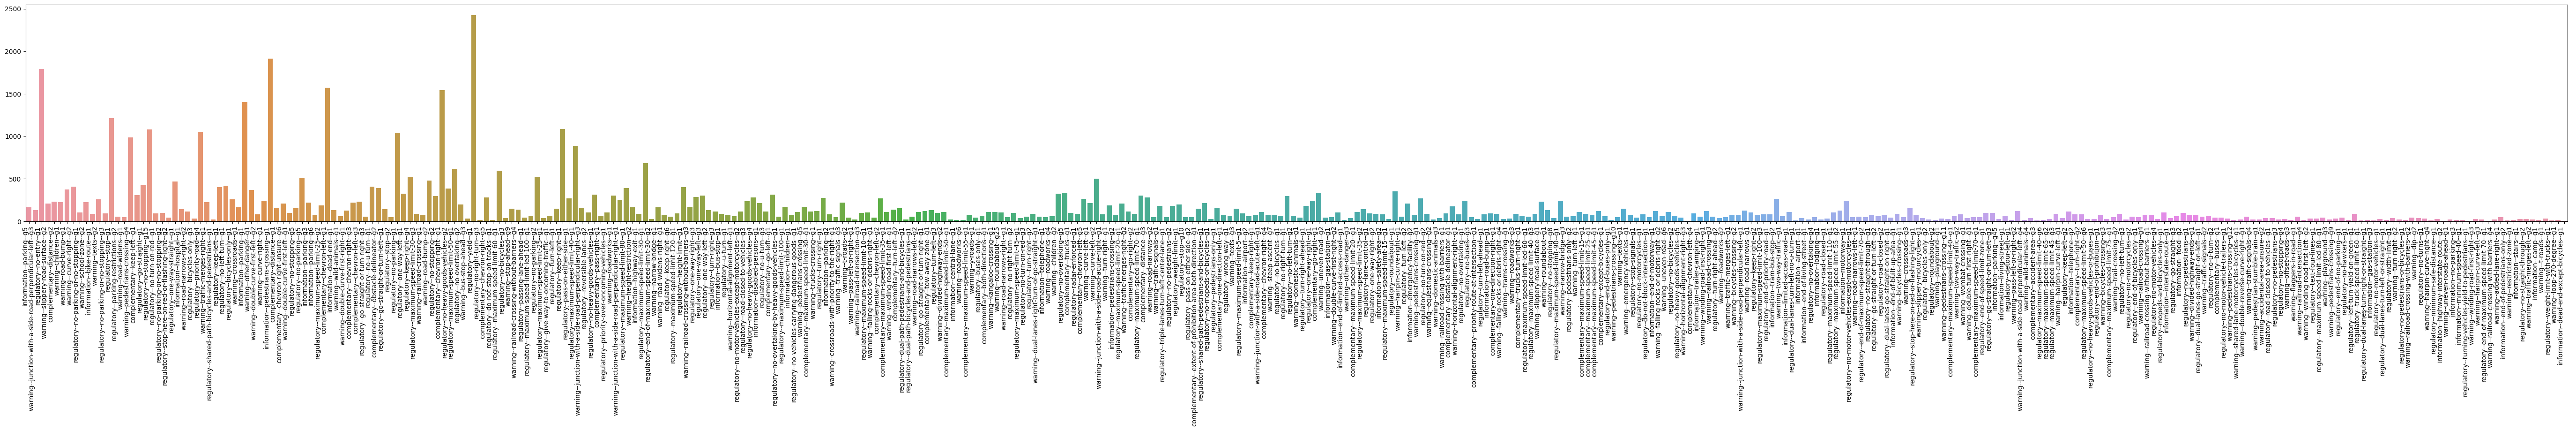

In [14]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (70,6))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical')
plt.show()

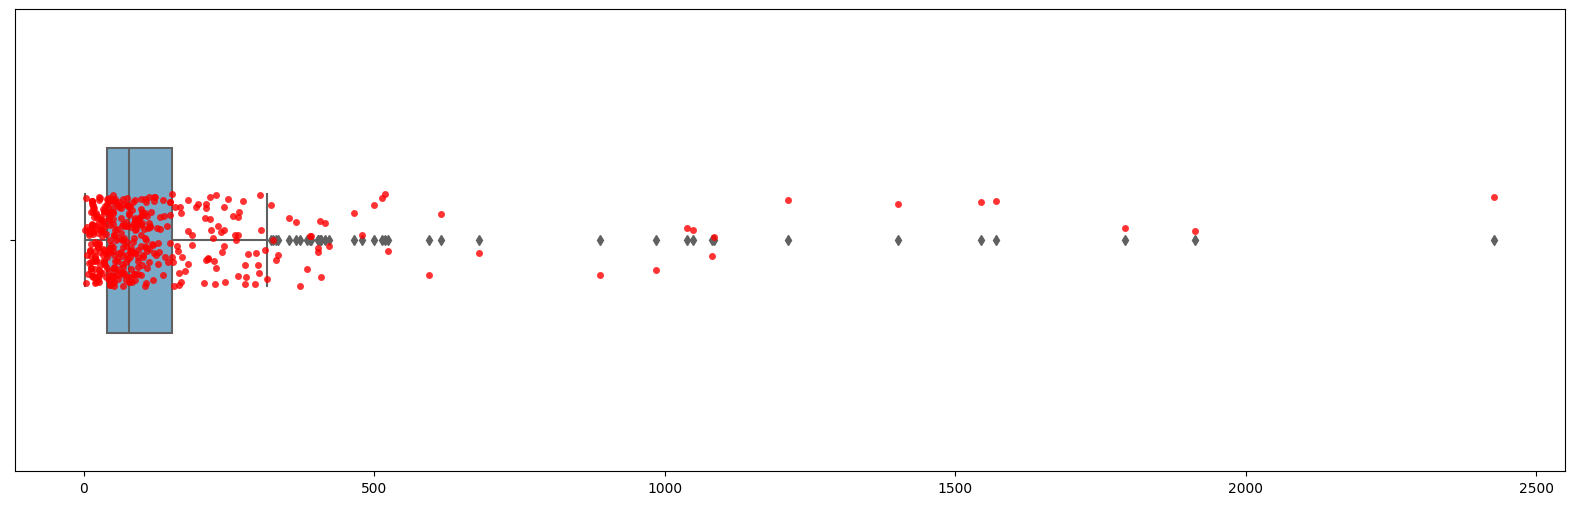

In [15]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)

# Converting Annotations From Mapillary Format to YOLO .txt Format

In [16]:
#Moving Validation Labels into respective folders:
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/splits")
with open("val.txt","r") as f:
  for line in f:
    shutil.move(str("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/annotations/"+line).replace("\n","")+".json","/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")

Error: ignored

In [ ]:
#Moving Training labels into respective folder:
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/splits")
with open("train.txt","r") as f:
  for line in f:
    shutil.move(str("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/annotations/"+line).replace("\n","")+".json","/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")

In [ ]:
#Moving additional training labels to respective folder:
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/annotations")
for file in os.listdir():
  if ".json" in file:
    shutil.move(file, "/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")

In [ ]:
#writing .txt files for validation files
while os.getcwd()!="/content":
  os.chdir("..")

def labelwrite(path_to_img,dest_path):
  os.chdir(path_to_img)
  for file in os.listdir():
    with open(file, "r") as j:
      data = json.load(j)
      w = open(str(file).replace("json","txt"), "w")
      w.write("")
      w.close
      for instance in range(0,len(data["objects"])):
        with open(str(file).replace("json","txt"),"a") as t:
          x= ((float(data["objects"][instance]["bbox"]["xmax"])+float(data["objects"][instance]["bbox"]["xmin"]))/2)/float(data["width"])
          y= ((float(data["objects"][instance]["bbox"]["ymax"])+float(data["objects"][instance]["bbox"]["ymin"]))/2)/float(data["height"])
          width= (float(data["objects"][instance]["bbox"]["xmax"])-float(data["objects"][instance]["bbox"]["xmin"]))/float(data["width"])
          height= (float(data["objects"][instance]["bbox"]["ymax"])-float(data["objects"][instance]["bbox"]["ymin"]))/float(data["height"])
          print("x="+str(x))
        # print("y="+str(y))
        # print("width="+str(width))
        # print("height="+str(height))
          t.write(str(class_list.index(data["objects"][instance]["label"]))+" "+ str(x) + " "+ str(y) + " " + str(width) + " " + str(height) +"\n")
    shutil.move(str(file).replace("json","txt"),dest_path)


In [ ]:
#Checking for unlabelled validation files
os.chdir("/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")
for entry in os.listdir():
  if ".json" in entry:
    if os.path.exists(str(entry).replace(".json",".txt"))== False:
      print(entry)

In [ ]:
#moving .txt files to correct folder for validation files
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")
for file in os.listdir():
  if ".txt" in file:
    shutil.move(file,"/content/drive/MyDrive/RoadSignDataset/Validation/labels")

In [ ]:
#writing .txt files for training files
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")
for file in os.listdir():
  if ".json" in file:
    with open(file, "r") as j:
      data = json.load(j)
      w = open(str(file).replace("json","txt"), "w")
      w.write("")
      w.close
      for instance in range(0,len(data["objects"])):
        with open(str(file).replace("json","txt"),"a") as t:
          x= ((float(data["objects"][instance]["bbox"]["xmax"])+float(data["objects"][instance]["bbox"]["xmin"]))/2)/float(data["width"])
          y= ((float(data["objects"][instance]["bbox"]["ymax"])+float(data["objects"][instance]["bbox"]["ymin"]))/2)/float(data["height"])
          width= (float(data["objects"][instance]["bbox"]["xmax"])-float(data["objects"][instance]["bbox"]["xmin"]))/float(data["width"])
          height= (float(data["objects"][instance]["bbox"]["ymax"])-float(data["objects"][instance]["bbox"]["ymin"]))/float(data["height"])
          print("x="+str(x))
        # print("y="+str(y))
        # print("width="+str(width))
        # print("height="+str(height))
          t.write(str(class_list.index(data["objects"][instance]["label"]))+" "+ str(x) + " "+ str(y) + " " + str(width) + " " + str(height) +"\n")

In [ ]:
#moving .txt files to correct folder for training files
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")
for file in os.listdir():
  if ".txt" in file:
    shutil.move(file,"/content/drive/MyDrive/RoadSignDataset/Train/labels")

In [ ]:
while os.getcwd()!="/content":
  os.chdir("..")

#Downloading YOLO requirements and repository

In [16]:
# Cloning the YOLOv5 Repository
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive")
if os.path.exists("yolov5")==False:

    print("preparing to clone yolov5 repository")

    !git clone https://github.com/ultralytics/yolov5
    os.chdir("yolov5")
    #Installing Dependencies

    print("preparing to install dependencies")

In [17]:
os.chdir("/content/drive/MyDrive/yolov5")
%pip install -r requirements.txt
os.chdir("..")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.6 MB/s eta 0:00:00


# Removing unnessesary classes

In [18]:
while os.getcwd()!="/content":
  os.chdir("..")
#Choosing selected classes to be removed
unusedclasslist = [0,3,5,7,21,28,29,32,39,44,47,57,63,67,74,75,77,80,84,85,89,91,94,102,104,105,120,124,125,126,127,128,131,132,134,138,139,140,141,142,145,146,152,160,163,162,165,166,168,169,170,174,184,185,186,187,188,189,190,191,194,195,198,200,202,205,210,215,221,222,232,237,238,250,254,255,258,259,260,269,270,274,275,277,280,281,282,285,286,287,288,292,295,296,297,301,304,305,306,308,309,310,315,316,319,322,324,325,331,334,335,336,338,341,343,342,345,348,351,352,353,355,356,358,359,360,362,364,365,367,368,369,371,372,373,374,375,377,379,380,381,383,385,386,389,390,393,395,396,398]
# Finding a list of classes without information
# or complementary classes

# Removing all information and complementary classes from labels
lineNumber = -1
Chosen_Word = "information"
Chosen_Word2= "complementary"
if os.path.exists("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/newlabelclasses.txt") ==True:
  os.remove("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/newlabelclasses.txt")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN")
with open("labelclasses.txt","r") as fileData:
  for line in fileData:
    lineNumber += 1
    if Chosen_Word in line:
      unusedclasslist.append(lineNumber)
    elif Chosen_Word2 in line:
      unusedclasslist.append(lineNumber)
    elif Chosen_Word or Chosen_Word2 not in line:
      # Creating a list of new classes
      if lineNumber not in unusedclasslist:
        with open("newlabelclasses.txt","a") as new:
          new.write(line)
print(unusedclasslist)
new = []
dup = []
for i in unusedclasslist:
  if i not in new:
    new.append(i)
  else:
    dup.append(i)
unusedclasslist = new

[0, 3, 5, 7, 21, 28, 29, 32, 39, 44, 47, 57, 63, 67, 74, 75, 77, 80, 84, 85, 89, 91, 94, 102, 104, 105, 120, 124, 125, 126, 127, 128, 131, 132, 134, 138, 139, 140, 141, 142, 145, 146, 152, 160, 163, 162, 165, 166, 168, 169, 170, 174, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 198, 200, 202, 205, 210, 215, 221, 222, 232, 237, 238, 250, 254, 255, 258, 259, 260, 269, 270, 274, 275, 277, 280, 281, 282, 285, 286, 287, 288, 292, 295, 296, 297, 301, 304, 305, 306, 308, 309, 310, 315, 316, 319, 322, 324, 325, 331, 334, 335, 336, 338, 341, 343, 342, 345, 348, 351, 352, 353, 355, 356, 358, 359, 360, 362, 364, 365, 367, 368, 369, 371, 372, 373, 374, 375, 377, 379, 380, 381, 383, 385, 386, 389, 390, 393, 395, 396, 398, 10, 11, 13, 19, 24, 25, 27, 30, 31, 34, 35, 36, 40, 42, 49, 51, 53, 56, 59, 65, 68, 79, 82, 95, 99, 107, 117, 121, 126, 135, 147, 148, 151, 157, 158, 161, 162, 164, 171, 173, 176, 179, 181, 182, 192, 196, 201, 209, 214, 216, 218, 220, 226, 228, 234, 235, 239, 240, 246, 247, 2

In [19]:
len(unusedclasslist)

237

In [20]:
# Removing all unwanted classes from training labels
os.chdir("/content/Train/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

# Removing all unwanted classes from training labels
os.chdir("/content/Validation/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

Number of files removed = 17982
Number of files removed = 2634


In [21]:
print(len(os.listdir("/content/Train/labels")))

18607


In [22]:
#Removing all unlabelled training images
os.chdir("/content/Train/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Train/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Train/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Train/images")

In [23]:
#Removing all unlabelled validation images
os.chdir("/content/Validation/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Validation/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Validation/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Validation/images")

In [24]:
print(numberofremovedimages)

2634


#Further reduction of dataset for low instance classes

In [25]:
#Creating a dictionary that maps labels used for other regions to the used region

In [26]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 164


In [27]:
class_names = []
class_names1 = []
duplicates = []
Dup2Original = {}
replacing_values = {}
name_key_dict = {}
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line
for key, value in name_key_dict.items():
  value_split = str(value).replace("\n","").split("--")
  if str(value_split[0]+" "+ value_split[1]) not in class_names:
    class_names.append(value_split[0]+" "+ value_split[1])
    class_names1.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))
  else:
    duplicates.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))

for i in duplicates:
  for j in class_names1:
    word_split = str(j).replace("\n","").split("--")
    dup_split = i.split("--")
    if word_split[0]+ word_split[1] == dup_split[0]+dup_split[1]:
      Dup2Original[list(name_key_dict.keys())[list(name_key_dict.values()).index(i)]] = list(name_key_dict.keys())[list(name_key_dict.values()).index(j)]
    

In [28]:
name_key_dict[172]

'regulatory--maximum-speed-limit-55--g2'

In [29]:
os.chdir("/content/Train/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)

os.chdir("/content/Validation/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)


In [30]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 93


In [31]:
#Finding the number of classes in validation labels
os.chdir("/content/Validation/labels")
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 93


In [32]:
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line

In [33]:
#Finding frequency
os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[name_key_dict[int(key)]] = value

In [34]:
#removing classes with frequency lower than 150
min_freq = 150
for i in Labels_with_freq.keys():
  if Labels_with_freq[i] <=min_freq:
    unusedclasslist.append(list(name_key_dict.values()).index(i))
# Removing all unwanted classes from training labels
os.chdir("/content/Train/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

# Removing all unwanted classes from Validation labels
os.chdir("/content/Validation/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))


Number of files removed = 4449
Number of files removed = 664


In [35]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 75


In [36]:
#Removing all unlabelled validation images
os.chdir("/content/Validation/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Validation/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Validation/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Validation/images")

In [37]:
#Removing all unlabelled training images
os.chdir("/content/Train/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Train/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Train/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Train/images")
print(numberofremovedimages)

4449


In [38]:
print(len(os.listdir("/content/Train/images"))-len(os.listdir("/content/Train/labels")))
print(len(os.listdir("/content/Validation/images"))-len(os.listdir("/content/Validation/labels")))

0
0


# Image Processing

In [39]:
#Defining a function that outputs height, width and area as a list
def get_img_size(path_to_imgdirectory):
  original_path = os.getcwd()
  os.chdir(path_to_imgdirectory)
  '''
  0 = height
  1 = width
  2 = Area
  3 = Channel
  '''
  height = []
  width = []
  Area = []
  for i in os.listdir():
    if ".jpg" in i:
      dimension_list = []
      image = cv2.imread(i)
      h,w,c = image.shape
      height.append(h)
      width.append(w)
      Area.append(h*w)
  return height,width,Area
  os.chdir(original_path)

In [40]:
# train_height,train_width,train_Area = get_img_size("/content/Train/images")

In [41]:
# #Finding size for scaling:
# quantile_num = 0.5
# print("Average image height: {}".format(np.average(train_height)))
# print("Average image width: {}".format(np.average(train_width)))
# print("Standard Deviation of image width: {}".format(np.std(train_width)))
# print("Standard Deviation of image height: {}".format(np.std(train_height)))
# print("Standard Deviation of image area: {}".format(np.std(train_Area)))
# X = train_height
# Y = train_width
# columns = ["Height","Width"]
# # Creating Boxplot of Height and Width

# # Creating a pandas dataframe to allow multiple boxplots on one figure
# df = pd.DataFrame(list(zip(X,Y)),columns = columns)

# fig, ax = plt.subplots(figsize = (20,6))
# sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
# sns.color_palette("husl",1)
# # boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

# # SET AXIS SIZE TO FIGURE SIZE 11 FONT

In [42]:
# General Cropping tool for specific example image
def gen_crop_img(path_img,percentage):
  original_path = os.getcwd()
  im = Image.open(path_img)
  w,h =im.size
  w1 = w*(percentage)
  h1 = h*(percentage)
  im1 = im.crop((w1,h1,w,h))
  os.chdir("/content")
  im1 = im1.save("test.jpg")
  os.chdir(original_path)

In [43]:
# gen_crop_img("/content/Validation/images/-dBtqhsBO346niG5o1CXBQ.jpg",0.4)

In [44]:
def label_crop_img(path,path_img,path_label):
  # Saving original working directory and changing working directory to image
  # path specified
  original_path = os.getcwd()
  os.chdir(path)
  # Iterates through each image in path

  # defining variables
  class_num =[]
  x_central = []
  y_central = []
  overall_width = []
  overall_height = []
  numberoflines = 0
  # Prints each iteration number
  # Setting initial bounds for cropping box co-ordinates
  # (x1,y1 must be minimised and x2,y2 must be maximised)
  y1 = 999999
  y2 = 0
  x1 = 999999
  x2 = 0
  # Opens image using PIL.Image to read image size
  im = Image.open(path_img)
  w,h = im.size
  os.chdir(path.replace("images","labels"))
  # Reads the associated text file to find label dimensions
  with open(path_label, "r") as file:
    # Iterates through each line of label .txt file
    for line in file:
      numberoflines +=1
      word_split = line.split()
      # defines temporary variables of bounding box that store individual 
      # label's dimensions on the image in pixel number (labels must be 
      # converted from percentages)
      y1_temp = h*(float(word_split[2])-float(word_split[4])/2)
      y2_temp = h*(float(word_split[2])+float(word_split[4])/2)
      x1_temp = w*(float(word_split[1])-float(word_split[3])/2)
      x2_temp = w*(float(word_split[1])+float(word_split[3])/2)
      # Checks if temporary co-ordinates are the minimum/maximum coordinates
      # of the image and if so, uses them as the cropping box dimensions
      if y1_temp <y1:
        y1 = y1_temp
      if x1_temp <x1:
        x1 = x1_temp
      if y2_temp >y2:
        y2 = y2_temp
      if x2_temp >x2:
        x2 = x2_temp
# Crops the image according to cropping box's two diagonal co-ordinates
  im1 = im.crop((x1,y1,x2,y2))
  # Deletes original label image and replaces with temporary text file
  os.chdir("/content")
  # Saves cropped image as original name
  img1 = im1.save("test_label_crop.jpg")
  # Changes working directory to working directory used when calling function
  os.chdir(original_path)
  

In [45]:
# label_crop_img("/content/Validation/images","-dBtqhsBO346niG5o1CXBQ.jpg","-dBtqhsBO346niG5o1CXBQ.txt")

In [46]:
'''
Defining a function that takes the path to images and:

-- Iterates through each image to find its total height, width
-- Maps the image name to associated text file in respective labels directory
-- Finds the dimensions of the bounding boxes of labels in image
-- Uses the maximum bounding box dimensions as a reference for cropping image
-- Adds a 50 pixel tolerance to cropping box
-- Checks if the cropping box's dimensions are less than 1/5 of the overall 
   dimensions of the original image
    --if the cropping area is too small, adds 1/5 of the orginal image to the 
      box's dimensions
-- Crops the image to cropping box's area (using top-left and bottom-right
   co-ordinates to draw the rectanglular box)
-- Creates a new text file for new label location and deletes original
'''
def crop_img(path_img):
  # Saving original working directory and changing working directory to image
  # path specified
  original_path = os.getcwd()
  os.chdir(path_img)
  number = 0
  # Iterates through each image in path
  for i in os.listdir(path_img):
    # defining variables
    number +=1
    class_num =[]
    x_central = []
    y_central = []
    overall_width = []
    overall_height = []
    numberoflines = 0
    # Prints each iteration number
    print(i)
    # Setting initial bounds for cropping box co-ordinates
    # (x1,y1 must be minimised and x2,y2 must be maximised)
    y1 = 999999
    y2 = 0
    x1 = 999999
    x2 = 0
    if ".jpg" in i:
      # Opens image using PIL.Image to read image size
      im = Image.open(i)
      w,h = im.size
      os.chdir(path_img.replace("images","labels"))
      # Reads the associated text file to find label dimensions
      with open(i.replace(".jpg",".txt"), "r") as file:
        # Iterates through each line of label .txt file
        for line in file:
          numberoflines +=1
          word_split = line.split()
          # defines temporary variables of bounding box that store individual 
          # label's dimensions on the image in pixel number (labels must be 
          # converted from percentages)
          y1_temp = h*(float(word_split[2])-float(word_split[4])/2)
          y2_temp = h*(float(word_split[2])+float(word_split[4])/2)
          x1_temp = w*(float(word_split[1])-float(word_split[3])/2)
          x2_temp = w*(float(word_split[1])+float(word_split[3])/2)
          # Converts the central co-ordinates, width, height and class number of 
          # each label of pan image into pixel number and stores these in a list
          x_central.append(float(w* float(word_split[1])))
          y_central.append(float( h* float(word_split[2])))
          overall_width.append(float( w* float(word_split[3])))
          overall_height.append(float( h* float(word_split[4])))
          class_num.append(word_split[0])
          # Checks if temporary co-ordinates are the minimum/maximum coordinates
          # of the image and if so, uses them as the cropping box dimensions
          if y1_temp <y1:
            y1 = y1_temp
          if x1_temp <x1:
            x1 = x1_temp
          if y2_temp >y2:
            y2 = y2_temp
          if x2_temp >x2:
            x2 = x2_temp
          # Adds 50 pixels to cropping box's dimensions, making sure that the
          # box's dimensions do not go beyond the original image's dimensions
          if x1 - 50 > 0:
            x1 += -50
          if y1 - 50 > 0:
            y1 += -50
          if x2 + 50 < w:
            x2 += 50
          if y2 + 50 < w:
            y2 += 50
          # Checks if the cropping box is smaller than 1/5 of the original
          # image's dimensions and if so, adds 1/5 of the original image's
          # dimensions to image
          if x2-x1 < w/5:
            if x1 - w/5 <0:
              x2 += w/5
            else:
              x1 += -w/5
          if y2 - y1 <h/5:
            if y1 - h/5 <0:
              y2 += h/5
            else:
              y1 += -w/5
    # Crops the image according to cropping box's two diagonal co-ordinates
    im1 = im.crop((x1,y1,x2,y2))
    # Finds the new image size
    w1,h1 = im1.size
    # Creates a temporary text file to write new labels
    w = open("temp.txt", "w")
    w.write("")
    w.close
    with open("temp.txt","a") as file1:
      for j in range(0,numberoflines):
        # Writes new labels in % of image size using previous lists 
        # defined earlier
        file1.write(str(class_num[j])+" "+str((x_central[j]-x1)/w1)+" "+
                    str((y_central[j]-y1)/h1)+" "+str(overall_width[j]/w1)+" "+
                    str(overall_height[j]/h1)+"\n")
    # Deletes original label image and replaces with temporary text file
    os.remove(str(i.replace(".jpg",".txt")))
    os.rename("temp.txt",i.replace(".jpg",".txt"))
    os.chdir(path_img)
    # Saves cropped image as original name
    img1 = im1.save(i)
  # Changes working directory to working directory used when calling function
  os.chdir(original_path)
    

In [47]:
crop_img("/content/Validation/images")

pq_i15IOSsExKRNdK5D3gA.jpg
FzLRprXe9xvkaL223rJvbQ.jpg
WbPxRhI1o_STlpB_i9PxMQ.jpg
nZR7456QF95KSM0z2-os6g.jpg
xw66-JnZctLHuv3KkxLY-A.jpg
_RIof5Gv94hqmZwe2m-ghQ.jpg
sCjPcC-tZQER6u6LqKR2jg.jpg
wFc-IFdECY6PcafnfcWPFg.jpg
BGLfWoMlwZKrZyZPIppB9A.jpg
iWQr1Uk9upxYSMPo20Um5A.jpg
pWqTwFtmORrN1Zfwk0PP6Q.jpg
4Ri3xpRQZeS_Yg3ru5GrDQ.jpg
MMWyP5danuLlRDN3NcqpDw.jpg
gqYswHbvjT-SS0WszCxA7Q.jpg
GoMg8c-LGNbaST3gWaBzGw.jpg
QJGNraUeNk2LljDQd2uE3A.jpg
jSev1cJCi6XJl1L7_D2TUA.jpg
Yv8D9pOtNdG9gmJGykDN2Q.jpg
i3IpMSprQkAzjxEuXfm-Ag.jpg
EAnNEVO0Z-CkUnj4907Fkg.jpg
VQ-MLcUJx9UbC_RkabbDrw.jpg
cMk8mqf5dXSqEDC1PBbIbg.jpg
KVgqvP6qCjOj2BT8nK1sYg.jpg
AFkarzGhALoVge6-E8eJqw.jpg
cwXGIFSLcyaEjCGnIVO7ew.jpg
l-_jG8D1U4q97l5RiBCNhg.jpg
YvCWSXHmmDC2rIa4ax7ANA.jpg
XNHM36yUcMQziFrOK7kc1w.jpg
plrleTQVXhUfQlQoLzuAiQ.jpg
GKF36HhVzifIXxpXljwz4Q.jpg
R7fDuZo-DepgtTHoegH0_Q.jpg
81bbImImQsNzG2ZXyssYRA.jpg
L86aWR6757f6EbSKtXdOGA.jpg
h2-d8DJAN6gIwPz4bgeBMg.jpg
mgFDPmj9SM8h6NEf9_haOA.jpg
H3Y-HG2-PwJGwbZx6kWEfw.jpg
8KOF2BnPil-60U1p0H1_pw.jpg
P

In [48]:
crop_img("/content/Train/images")

Streaming output truncated to the last 5000 lines.
hI2Lp0ZsvG0K7bNQEpG04Q.jpg
pR4pYptO0q-Y0TNv04KJaw.jpg
LjJF2NRRlz4lLHIf4HVCAA.jpg
V2qprR_mLvd1IAa-ucktWA.jpg
luNi6X4ARVqkauxWjnJoFA.jpg
YvZenZaSxOVeSaVZXKasXw.jpg
Gg6Gt4OQj6YSzE4D9fyGtw.jpg
sLyM97H_KCjo57R4Ynmmtg.jpg
DFR-Zwa4L_TaMCI-zw_iaA.jpg
7417wCCCkz3x-Sfvf_orwQ.jpg
-MGHrk6ifhEZhWCjotCb4A.jpg
NOG6XGUUrveyNDkS-WwgNw.jpg
qFE6kyyxNTEuVJR1uHha4A.jpg
CqkkjCbNnWbuJkibzguBSw.jpg
N-WdZc-aNzc9JPxWlsdvEQ.jpg
aiQeshBrKB1BXFix-5xS_g.jpg
ikWB9MyUfVPDmMxcAFFO_Q.jpg
Q0AVhok1KktYWtKCSGJuYQ.jpg
d7WnjlH1T-Fh71sDPGKwhg.jpg
eH1QovYECGurQ-Bwpasr4g.jpg
cKRzWlTmjAbWNaFiywaqJA.jpg
OhTt6U_55jASONCqmkXm8g.jpg
EXTUftAnIcCJCnBiw0CITQ.jpg
gqs0VirJrIaZcGh-UKx0gg.jpg
RC1OWURPQCqxNMi5LXCMow.jpg
VSW8hVsJrNB_HVHOxb57xg.jpg
GqHZvUOfAm9OXXr8TvcTIA.jpg
37H9iWBUGzdcBZEqrLAbHA.jpg
aHZk8g5JtY78J_cutHrWEw.jpg
GQ1nSCt9wabcZAfdeumK0Q.jpg
rli8yq_6OmxSuzqnBnJq3A.jpg
4lwUehBK0tmo4spJQSOE6w.jpg
aYWocSE9Hf0gobqeyy9EcQ.jpg
TOQAZ_ZsqPOQAPET74rhdQ.jpg
-fJOexo6x_iCJ0u6T_BHAA.jpg
7lgR

In [49]:
# train_crop_height,train_crop_width,train_crop_Area = get_img_size("/content/Train/images")

In [50]:
# #Finding size for scaling:
# quantile_num = 0.2
# print(str(quantile_num) + " quantile of image height: {}".format(np.quantile(train_crop_height, quantile_num)))
# print(str(quantile_num) +" quantile of image width: {}".format(np.quantile(train_crop_width, quantile_num)))
# print("Standard Deviation of image width: {}".format(np.std(train_crop_width)))
# print("Standard Deviation of image height: {}".format(np.std(train_crop_height)))
# print("Standard Deviation of image area: {}".format(np.std(train_crop_Area)))
# X = train_crop_height
# Y = train_crop_width
# columns = ["Height","Width"]
# # Creating Boxplot of Height and Width

# # Creating a pandas dataframe to allow multiple boxplots on one figure
# df = pd.DataFrame(list(zip(X,Y)),columns = columns)

# fig, ax = plt.subplots(figsize = (20,6))
# sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
# sns.color_palette("husl",1)
# # boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

#Dataset Attributes

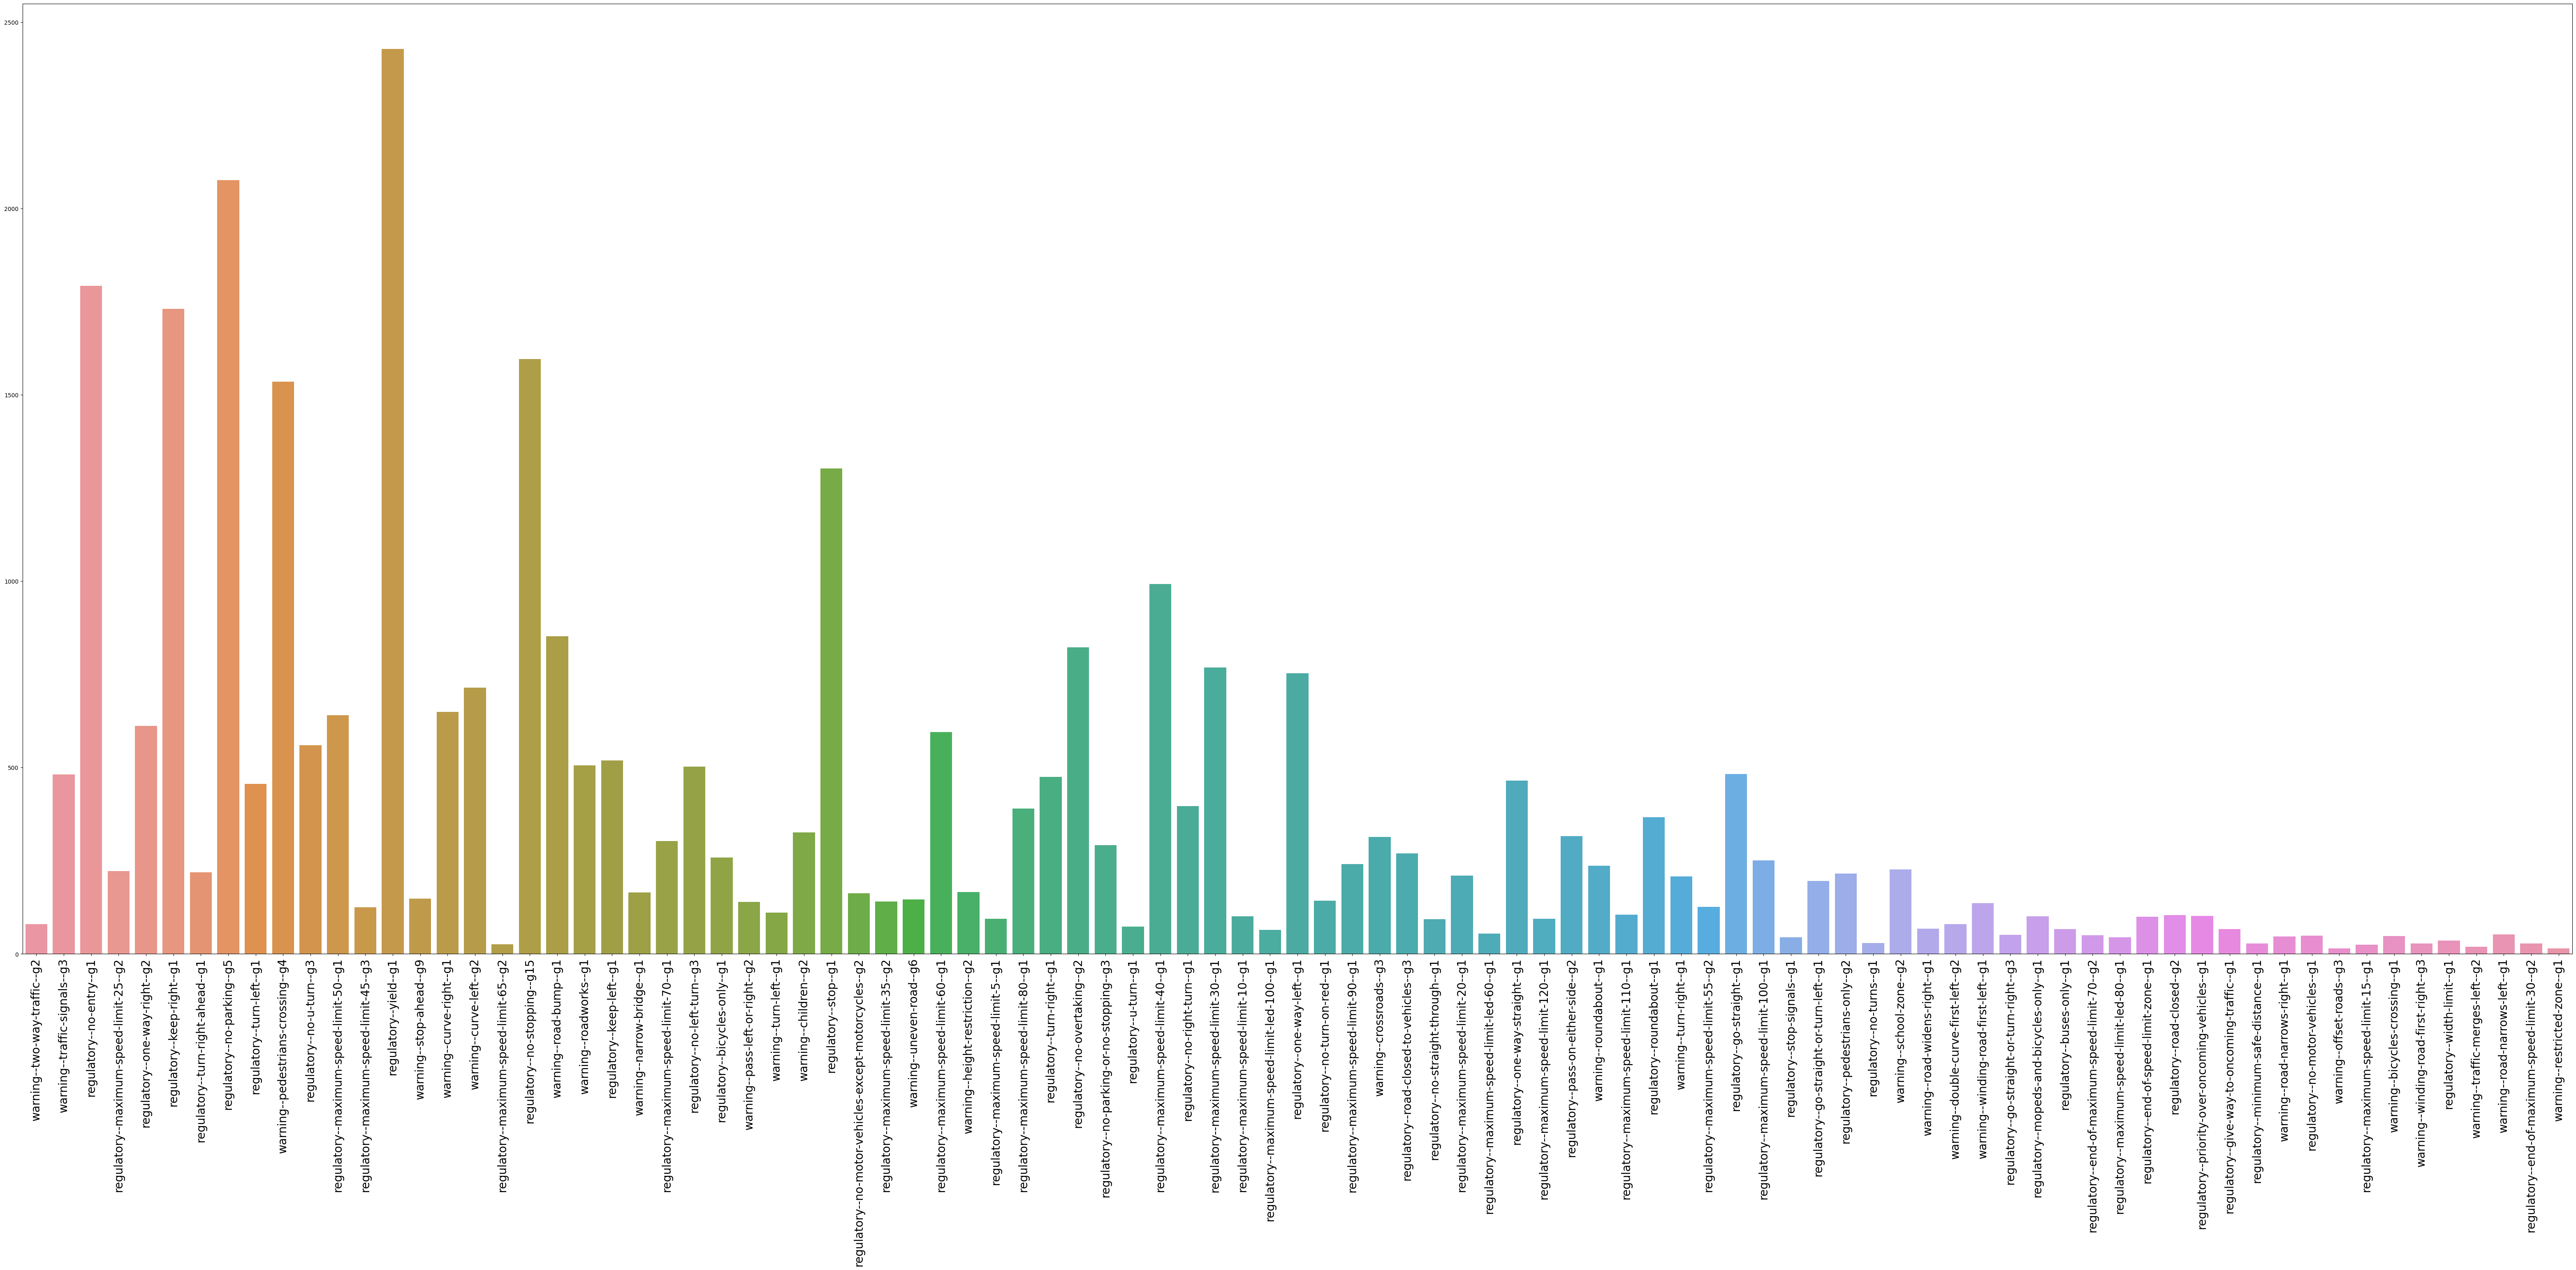

In [51]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (80,30))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical', size = 20)
plt.show()

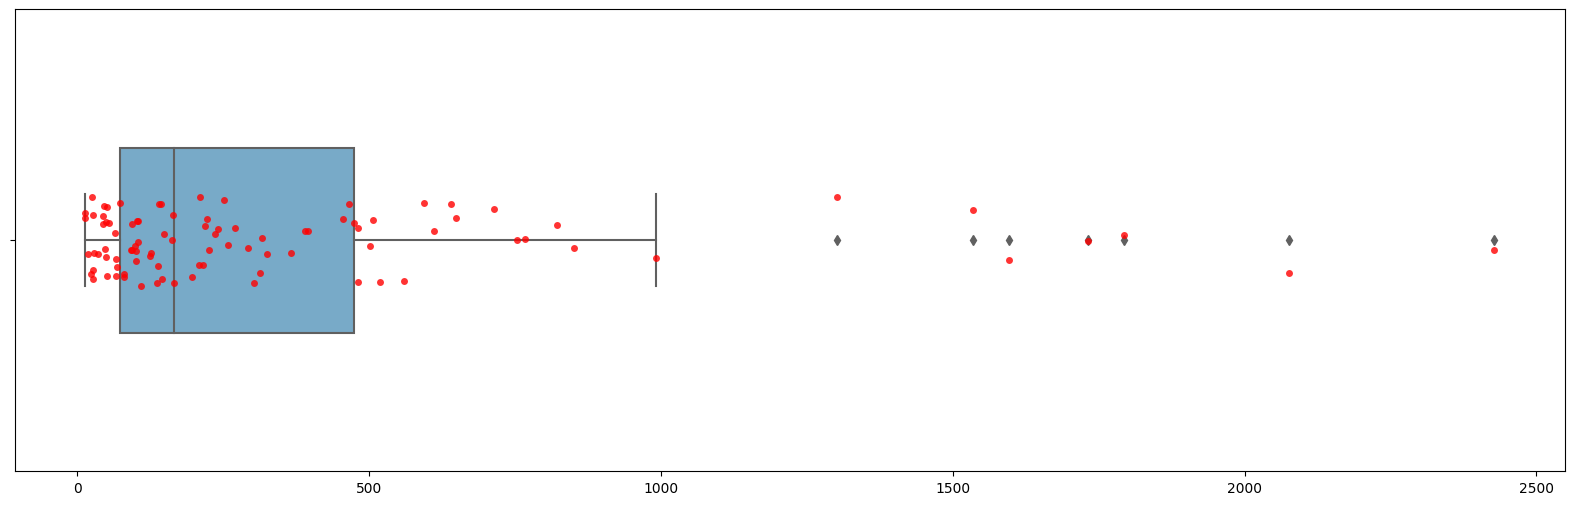

In [52]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)

#Creating Yaml files for YOLO:

In [53]:
#Defining Training Data
while os.getcwd()!="/content":
  os.chdir("..")
data = dict(
    names = class_list,
    nc = len(class_list),
    val = "Validation/images",
    test = "Test",
    train = "Train/images",
    path = "/content",
)
with open("custom1.yaml","w") as y:
  documents = yaml.dump(data,y)
shutil.move("/content/custom1.yaml","/content/drive/MyDrive/yolov5/data")

Error: ignored

In [54]:
#  lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3) 
#  lrf: 0.01  # final OneCycleLR learning rate (lr0 * lrf) 
#  momentum: 0.937  # SGD momentum/Adam beta1 
#  weight_decay: 0.0005  # optimizer weight decay 5e-4 
#  warmup_epochs: 3.0  # warmup epochs (fractions ok) 
#  warmup_momentum: 0.8  # warmup initial momentum 
#  warmup_bias_lr: 0.1  # warmup initial bias lr 
#  box: 0.05  # box loss gain 
#  cls: 0.5  # cls loss gain 
#  cls_pw: 1.0  # cls BCELoss positive_weight 
#  obj: 1.0  # obj loss gain (scale with pixels) 
#  obj_pw: 1.0  # obj BCELoss positive_weight 
#  iou_t: 0.20  # IoU training threshold 
#  anchor_t: 4.0  # anchor-multiple threshold 
#  # anchors: 3  # anchors per output layer (0 to ignore) 
#  fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5) 
#  hsv_h: 0.015  # image HSV-Hue augmentation (fraction) 
#  hsv_s: 0.7  # image HSV-Saturation augmentation (fraction) 
#  hsv_v: 0.4  # image HSV-Value augmentation (fraction) 
#  degrees: 0.0  # image rotation (+/- deg) 
#  translate: 0.1  # image translation (+/- fraction) 
#  scale: 0.5  # image scale (+/- gain) 
#  shear: 0.0  # image shear (+/- deg) 
#  perspective: 0.0  # image perspective (+/- fraction), range 0-0.001 
#  flipud: 0.0  # image flip up-down (probability) 
#  fliplr: 0.5  # image flip left-right (probability) 
#  mosaic: 1.0  # image mosaic (probability) 
#  mixup: 0.0  # image mixup (probability) 
#  copy_paste: 0.0  # segment copy-paste (probability)

In [ ]:
  '''
  lr0= 0.025,  # initial learning rate (SGD=1E-2, Adam=1E-3)
  lrf= 0.25,  # final OneCycleLR learning rate (lr0 * lrf)
  momentum= 1.1244,  # SGD momentum/Adam beta1
  '''

In [53]:
os.chdir("/content")
if os.path.exists("/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml") == True:
  os.remove("/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml")

#Creating Hyperparameters
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for high-augmentation COCO training from scratch
# python train.py --batch 32 --cfg yolov5m6.yaml --weights '' --data coco.yaml --img 1280 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials
hyps = dict(
  lr0= 0.01, # initial learning rate (SGD=1E-2, Adam=1E-3) 
  lrf= 0.01,  # final OneCycleLR learning rate (lr0 * lrf) 
  momentum= 0.937,  # SGD momentum/Adam beta1
  weight_decay= 0.0005,  # optimizer weight decay 5e-4
  warmup_epochs= 3.0,  # warmup epochs (fractions ok)
  warmup_momentum= 0.8,  # warmup initial momentum
  warmup_bias_lr= 0.1,  # warmup initial bias lr
  box= 0.4545,  # box loss gain
  cls= 0.3,  # cls loss gain
  cls_pw= 1.0,  # cls BCELoss positive_weight
  obj= 0.7,  # obj loss gain (scale with pixels)
  obj_pw= 1.0,  # obj BCELoss positive_weight
  iou_t= 0.20,  # IoU training threshold
  anchor_t= 4.0,  # anchor-multiple threshold
  # anchors: 3  # anchors per output layer (0 to ignore)
  fl_gamma= 0.0,  # focal loss gamma (efficientDet default gamma=1.5)
  hsv_h= 0.015,  # image HSV-Hue augmentation (fraction)
  hsv_s= 0.7,  # image HSV-Saturation augmentation (fraction)
  hsv_v= 0.4,  # image HSV-Value augmentation (fraction)
  degrees= 0.0,  # image rotation (+/- deg)
  translate= 0.1,  # image translation (+/- fraction)
  scale= 0.9,  # image scale (+/- gain)
  shear= 0.0,  # image shear (+/- deg)
  perspective= 0.0,  # image perspective (+/- fraction), range 0-0.001
  flipud= 0.0, # image flip up-down (probability)
  fliplr= 0.5,  # image flip left-right (probability)
  mosaic= 1.0,  # image mosaic (probability)
  mixup= 0.1,  # image mixup (probability)
  copy_paste= 0.1,  # segment copy-paste (probability)
  )
with open("custom_hyps.yaml","w") as y:
  documents = yaml.dump(hyps,y)
shutil.move("/content/custom_hyps.yaml","/content/drive/MyDrive/yolov5/data/hyps")

'/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml'

#Training

In [57]:
#Training using pre-trained model from YOLOV5 repository
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --data custom1.yaml --weights yolov5m.pt --batch-size 16 --epochs 500 --img 768 --hyp custom_hyps.yaml --name boxlsmtn

train: weights=yolov5m.pt, cfg=, data=custom1.yaml, hyp=custom_hyps.yaml, epochs=500, batch_size=16, imgsz=768, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=boxlsmtn, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 122 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-10-g10c025d Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: anchor_t=4.0, box=0.05, cls=0.3, cls_pw=1.0, copy_paste=0.1, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.2, lr0=0.025, lrf=0.25, mixup=0.

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --resume /content/drive/MyDrive/yolov5/runs/train/boxlsmtn5/weights/last.pt

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/yolov5/runs/train/boxlsmtn5/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-10-g10c025d Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: anchor_t=4.0, box=0.05, cls=0.3, cls_pw=1.0, copy_paste=0.1, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.2, lr0=0.025, lrf=0.25, mixup=0.

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")

In [54]:
os.chdir("/content/drive/MyDrive/yolov5")
#Validation
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --data custom1.yaml --img 640

val: data=/content/drive/MyDrive/yolov5/data/custom1.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-10-g10c025d Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 22469334 parameters, 0 gradients, 53.0 GFLOPs
100% 755k/755k [00:00<00:00, 994kB/s] 
val: Scanning /content/Validation/labels... 2022 images, 0 backgrounds, 0 corrupt: 100% 2022/2022 [00:00<00:00, 8509.17it/s]
val: New cache created: /content/Validation/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 64/64 [00:51<00:00,  1.25it/s]
                   all       2022       

#Reading and interpreting initial training results

In [ ]:
print(os.getcwd())
os.chdir("/content")

/content/Train/labels


In [ ]:
#Reading results from Yolo csv file
results1 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp/results.csv")
results2 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp2/results.csv")
results3 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp3/results.csv")
results4 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp4/results.csv")
results5 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp5/results.csv")

combined_df = pd.concat([results1,results2,results3,results4,results5])
combined_df.to_csv("combined_file.csv", index=False)
results = pd.read_csv("combined_file.csv")
print(len(results))

with open('combined_file.csv', 'r') as input_file:
    reader = csv.reader(input_file)
    
    # Create a new CSV file for the output
    with open('output.csv', 'w', newline='') as output_file:
        writer = csv.writer(output_file)
        

       # Iterate through the rows in the input file
        for i, row in enumerate(reader, start=-1):
            # Add the row number as the first column
            row.insert(0, i)
            # Write the modified row to the output file
            writer.writerow(row)
df = pd.read_csv("output.csv")
df.rename(columns={"-1": "Epoch_Number"}, inplace=True)
df.to_csv("results_initial.csv")

df = pd.read_csv('results_initial.csv')
os.remove("results_initial.csv")
# Remove the 2nd column (index 1)
df = df.drop(df.columns[2], axis=1)
# Write the DataFrame to a new CSV file
df.to_csv('results_initial1.csv', index=False)


1413


0.23144


<function matplotlib.pyplot.show(*args, **kw)>

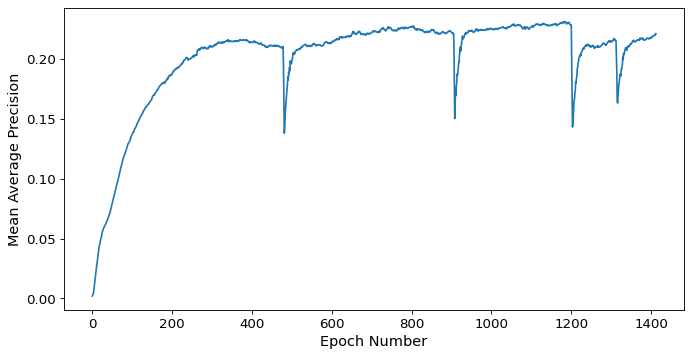

In [ ]:
#Plotting epoch number vs mAP
X= df["Epoch_Number"]
Y= df["     metrics/mAP_0.5"]
print(max(Y))
plt.figure(figsize=(10,5),dpi=80)
plt.xlabel("Epoch Number",fontsize=13)
plt.ylabel("Mean Average Precision",fontsize=13)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.plot(X,Y)
plt.show

In [ ]:
for i in df.columns:
  print(i)

               epoch
      train/box_loss
      train/obj_loss
      train/cls_loss
   metrics/precision
      metrics/recall
     metrics/mAP_0.5
metrics/mAP_0.5:0.95
        val/box_loss
        val/obj_loss
        val/cls_loss
               x/lr0
               x/lr1
               x/lr2


In [ ]:
df

KeyError: ignored

0.3392


<function matplotlib.pyplot.show(*args, **kw)>

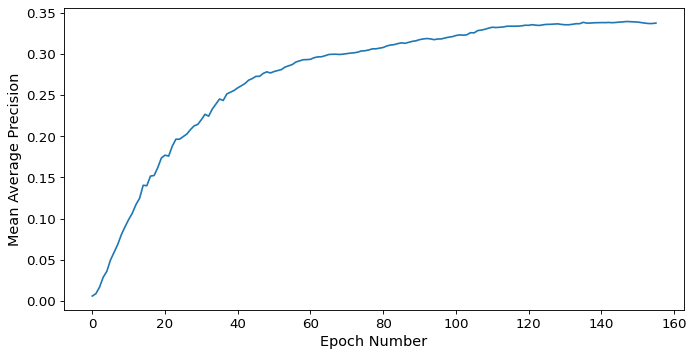

In [ ]:
#Plotting epoch number vs mAP
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp8/results.csv")
X= df["               epoch"]
Y= df["     metrics/mAP_0.5"]
print(max(Y))
plt.figure(figsize=(10,5),dpi=80)
plt.xlabel("Epoch Number",fontsize=13)
plt.ylabel("Mean Average Precision",fontsize=13)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.plot(X,Y)
plt.show



1.   Find minimum frequency of class distribution
2.   Vary class cutoff within the range 150 - 350
3.   Cropping algorithms for traing on manual driving dataset
4.   Push 640 resize limit up (find minimum image size)
5.   Manually resize
6.   Set minimum bound on max dimensions in pixels

#Testing on Partially Annotated Dataset

In [ ]:
os.mkdir("/content/Test/labels")
os.mkdir("/content/Test/jsonlabels")

In [ ]:
#Moving Testing labels into respective folder
os.chdir("/content/Test/images")
for i in os.listdir():
  shutil.copy("/content/Test/mtsd_v2_partially_annotated/annotations/"+ i.replace(".jpg",".json"),"/content/Test/jsonlabels")

In [ ]:
#Writing Class list yaml file- same as labelstring list made previously had to include this step to move list from VS to Colab:
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt") as f:
  class_list = f.readlines()
  class_list = [x.strip() for x in class_list]
print(class_list)

['other-sign', 'regulatory--keep-right--g1', 'regulatory--priority-over-oncoming-vehicles--g1', 'regulatory--height-limit--g1', 'regulatory--maximum-speed-limit-35--g2', 'warning--railroad-crossing-with-barriers--g1', 'warning--curve-left--g2', 'warning--falling-rocks-or-debris-right--g1', 'regulatory--keep-right--g4', 'warning--pedestrians-crossing--g4', 'complementary--go-right--g2', 'complementary--keep-left--g1', 'regulatory--maximum-speed-limit-45--g3', 'complementary--chevron-right--g3', 'regulatory--one-way-right--g2', 'regulatory--yield--g1', 'regulatory--one-way-straight--g1', 'warning--curve-right--g1', 'regulatory--pedestrians-only--g2', 'information--emergency-facility--g2', 'regulatory--no-entry--g1', 'warning--railroad-crossing--g3', 'warning--pedestrians-crossing--g5', 'warning--crossroads--g3', 'complementary--chevron-left--g5', 'information--motorway--g1', 'regulatory--no-stopping--g15', 'information--pedestrians-crossing--g1', 'warning--railroad-crossing-without-barri

In [ ]:
# shutil.rmtree("/content/Test")

In [ ]:
def labelwrite(path_to_img,dest_path):
  os.chdir(path_to_img)
  for file in os.listdir():
    # print("current file ="+ file)
    with open(file, "r") as j:
      data = json.load(j)
      w = open(str(file).replace("json","txt"), "w")
      w.write("")
      w.close
      for instance in range(0,len(data["objects"])):
        with open(str(file).replace("json","txt"),"a") as t:
          x= ((float(data["objects"][instance]["bbox"]["xmax"])+float(data["objects"][instance]["bbox"]["xmin"]))/2)/float(data["width"])
          y= ((float(data["objects"][instance]["bbox"]["ymax"])+float(data["objects"][instance]["bbox"]["ymin"]))/2)/float(data["height"])
          width= (float(data["objects"][instance]["bbox"]["xmax"])-float(data["objects"][instance]["bbox"]["xmin"]))/float(data["width"])
          height= (float(data["objects"][instance]["bbox"]["ymax"])-float(data["objects"][instance]["bbox"]["ymin"]))/float(data["height"])

        # print("y="+str(y))
        # print("width="+str(width))
        # print("height="+str(height))
          t.write(str(class_list.index(data["objects"][instance]["label"]))+" "+ str(x) + " "+ str(y) + " " + str(width) + " " + str(height) +"\n")
    shutil.move(str(file).replace("json","txt"),dest_path)

In [ ]:
labelwrite("/content/Test/jsonlabels","/content/Test/labels")

In [ ]:
os.chdir("/content/Test/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

Number of files removed = 6333


In [ ]:
#Removing all unlabelled training images
os.chdir("/content/Test/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Test/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Test/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Test/images")
print(numberofremovedimages)

6333


In [ ]:
# shutil.move("/content/Test/images/5TTRQQ_FF_6j2b2P425Jmw.jpg","/content/drive/MyDrive/RoadSignDataset/Workspace")
# shutil.move("/content/Test/labels/5TTRQQ_FF_6j2b2P425Jmw.txt","/content/drive/MyDrive/RoadSignDataset/Workspace")

In [ ]:
os.remove("/content/Test/labels/5TTRQQ_FF_6j2b2P425Jmw.txt")
os.remove("/content/Test/images/5TTRQQ_FF_6j2b2P425Jmw.jpg")

In [ ]:
crop_img("/content/Test/images")

In [ ]:
test_crop_height,test_crop_width,test_crop_Area = get_img_size("/content/Test/images")

0.2 quantile of image height: 647.0
0.2 quantile of image width: 671.0
Standard Deviation of image width: 528.5054389967562
Standard Deviation of image height: 288.1378176801973
Standard Deviation of image area: 928955.8943336976


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)]

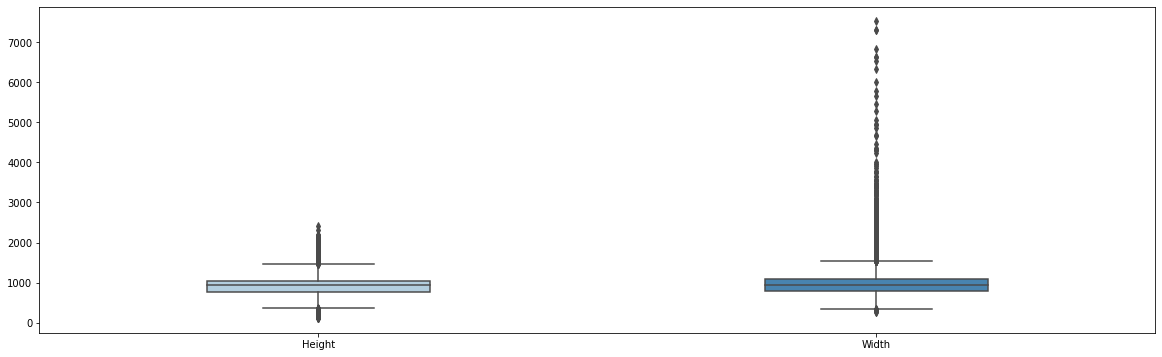

In [ ]:
#Finding size for scaling:
quantile_num = 0.2
print(str(quantile_num) + " quantile of image height: {}".format(np.quantile(test_crop_height, quantile_num)))
print(str(quantile_num) +" quantile of image width: {}".format(np.quantile(test_crop_width, quantile_num)))
print("Standard Deviation of image width: {}".format(np.std(test_crop_width)))
print("Standard Deviation of image height: {}".format(np.std(test_crop_height)))
print("Standard Deviation of image area: {}".format(np.std(test_crop_Area)))
X = test_crop_height
Y = test_crop_width
columns = ["Height","Width"]
# Creating Boxplot of Height and Width

# Creating a pandas dataframe to allow multiple boxplots on one figure
df = pd.DataFrame(list(zip(X,Y)),columns = columns)

fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
# boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

In [ ]:
testiterationname = "Single_img3"

In [ ]:
#Detecting on test dataset
os.chdir("/content/drive/MyDrive/yolov5")
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --source /content/Test/images --img 768 --save-txt --save-conf --name testiterationname --conf-thres 0.6
# !python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --source /content/stop.jpg --img 672 --save-txt --save-conf --name "Single_img"

Creating a Confusion Matrix

In [ ]:
#Defining Row and Column names for a tempoary row column name variable which
# will make mapping labels easier

confusionmatrix_rowcolumn_list = ["Background"]
final_confusionmatrix_rowcolum_list = ["Background"]
for i in name_key_dict:
  confusionmatrix_rowcolumn_list.append(i)
  
#Defining final row and column names. This will replace the temporary values once
# all values in the matrix have been filled
for i in name_key_dict:
  name = str(name_key_dict[i]+"("+str(i)+")")
  final_confusionmatrix_rowcolum_list.append(name)

os.chdir("/content/Test/labels")

df = pd.DataFrame(columns = confusionmatrix_rowcolumn_list,index = confusionmatrix_rowcolumn_list)
df.fillna(0, inplace = True)
df
#The x axis is actual predictions, the y axis is predicted positive

In [ ]:
def have_common_elements(list1, list2):
    common_elements = list(set(list1) & set(list2))
    return common_elements


In [ ]:
#Populating confusion matrix
number_of_exceptions = 0
#Iterating over all files in Test/labels Directory
for file in os.listdir("/content/Test/labels"):
  actualclasspredictions = []
  predictedclasses = []
  number_of_exceptions = 0
  insertedintomatrix = []
  #Opens each label .txt file and reads it
  with open(file,"r") as actual:
    #checks if associated .txt file exists in the detected folder and if so, reads it too
    if os.path.exists("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/labels/"+file) == True:

      with open("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/labels/"+file) as predicted:
        #Parsing actual and predicted annotations
        for line in actual:
          word_split = line.split()
          actualclasspredictions.append(int(word_split[0]))

        for line in predicted:
          word_split = line.split()
          predictedclasses.append(int(word_split[0]))
        #Ensures there are no repeated elements, this can occur from poor IOU Thresholding but should be ignored
        predictedclasses = set(predictedclasses)
        actualclasspredictions = set(actualclasspredictions)
        correct_predictions = have_common_elements(predictedclasses,actualclasspredictions)
        #Checks for any correct predictions
        if bool(correct_predictions):
          for i in correct_predictions:
            df.loc[i,i] += 1
            insertedintomatrix.append(i)
            #Removes classes to ensure they are not checked again
            actualclasspredictions.remove(i)
            predictedclasses.remove(i)
            print("YAY: "+str(i))
        
        wrongpredictions = [x for x in predictedclasses if x not in actualclasspredictions]
        missedpredictions = [x for x in actualclasspredictions if x not in predictedclasses]
        if len(actualclasspredictions) <= len(predictedclasses):
          for j in predictedclasses:
            if j not in insertedintomatrix:
              #If there are remainer actual classes that were not predicted and unpaired where pairs remain
              for i in actualclasspredictions:
                if i not in insertedintomatrix:
                  print(j)
                  print(i)
                  try:
                    df.loc[j,i] +=1
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)
                  print("unpaired actual/ unpaired pairs  "+str(i)+str(j))
              #If there are no remainder actual classes but still unpaired predicted
              if j not in actualclasspredictions and j not in insertedintomatrix:
                df.loc[j,"Background"] +=1
                try:
                  df.loc[j,i] += 1
                except Exception as e:
                  number_of_exceptions += 1
                print("Unpaired Predicted: " +str(j))
                insertedintomatrix.append(j)


        elif len(predictedclasses) < len(actualclasspredictions):
          for i in actualclasspredictions:
            if i not in insertedintomatrix:        
              for j in predictedclasses:
                if j not in insertedintomatrix:

                  try:
                    df.loc[j,i] +=1
                    insertedintomatrix.append(i)
                    insertedintomatrix.append(j)
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)
                  print("unpaired predicted/ unpaired pairs"+ str(i))
                else:
                  try:
                    df.loc["Background",i] +=1
                    insertedintomatrix.append(i)
                    insertedintomatrix.append(j)
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)
                  print("Unpaired Actual "+ str(i))
# for i in insertedintomatrix:
#   if int(i) not in list(actualclasspredictions) and i not in list(predictedclasses):


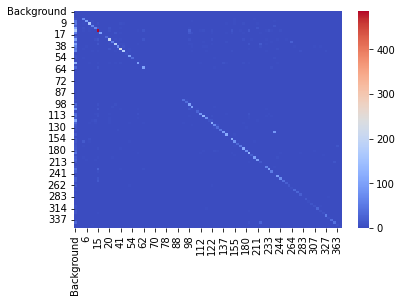

In [ ]:
sns.heatmap(df, cmap='coolwarm')
df.to_csv("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/heatmap.csv")

In [ ]:
total_correct = 0
for i in confusionmatrix_rowcolumn_list:
  total_correct += df.loc[i,i]
total_predictions = df.values.sum()

In [ ]:
total_correct/total_predictions

0.6225327939193331

In [ ]:
df.loc[1,1]

0

In [110]:
# calculate the number of classes, accounting for the background class
n_classes = df.shape[0] - 1

# create lists to hold the f1 score for each class
f1_scores = []

# iterate through the columns of the confusion matrix, excluding the background class
for i in df.columns:
  if i == "Background":
    continue
  else:
    # extract the true positives, false positives, and false negatives for the class
    tp = df.loc[i, i]
    fp = df.loc[:, i].sum() - tp
    fn = df.loc[i, :].sum() - tp
    
    # calculate the f1 score for the class
    precision_score = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision_score*recall)/(precision_score+recall)
    
    # append the score to the list
    f1_scores.append(f1)

# calculate the average f1 score for all classes, excluding the background class
avg_f1_score = np.nanmean(f1_scores)

# print the f1 score for each class, as well as the average f1 score
print('F1 scores:', f1_scores)
print('Average F1 score (excluding background class):', avg_f1_score)

KeyError: ignored

In [ ]:
from numpy import nan
for i in range(0,len(f1_scores)-1):
  if np.isnan(f1_scores[i])==True:
    del f1_scores[i]
print(np.mean(f1_scores))

IndexError: ignored

In [ ]:
#Reading the csv file as a pandas dataframe and displaying it
cm = pd.read_csv("/content/drive/MyDrive/yolov5/runs/detect/Single_img3/heatmap.csv",index_col=0)
cm

In [ ]:
#fpfn confusion matrix
truepos = 0
falsepos = 0
falseneg = 0
trueneg = 0
f1_scores = []
for i in cm.columns:
    if i == "Background":
        continue
    # extract the true positives, false positives, and false negatives for the class
    tp = cm.loc[i, i]
    fp = cm.loc[:, i].sum() - tp
    fn = cm.loc[i, :].sum() - tp
    truepos += tp
    falsepos += fp
    falseneg += fn
    
    # calculate precision score, handling division by zero
    if tp + fp == 0 or tp + fn ==0:
        continue
    else:
        precision_score = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision_score*recall)/(precision_score+recall)
  
  # append the score to the list
    f1_scores.append(f1)

calculate the average f1 score for all classes, excluding the background class
avg_f1_score = np.nanmean(f1_scores)

print the f1 score for each class, as well as the average f1 score
print('Average F1 score (excluding background class):', avg_f1_score)
twodmatrix =  [[truepos,falsepos],
             [falseneg,trueneg]]
twodmatrix = np.array(twodmatrix)
precision_scoretd = truepos/(truepos+falsepos)
recalltd = truepos/(truepos+falseneg)
f1td = (2*precision_scoretd*recalltd)/(precision_scoretd+recalltd)
print("2d matrix f1 score",f1td)
print(falseneg)
precision_score=0
recall = 0

precision_score = truepos/(truepos+fp)
recall = truepos/(truepos+fn)
f1 = (2*precision_score*recall)/(precision_score+recall)

In [ ]:
# Import necessary libraries
import seaborn as sns  # for creating heatmaps
import matplotlib.pyplot as plt  # for creating plots
import numpy as np  # for numerical operations

# Define group names, axis labels, and group counts for the heatmap
group_names = ["True Pos","False Pos","False Neg","True Neg"]
x_axis_labels = ["Positive","Negative"]
y_axis_labels = ["Positive","Negative"]

# Get the counts and percentages for each group in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in twodmatrix.flatten()]  # convert counts to strings
group_percentages = ["{0:.2%}".format(value) for value in twodmatrix.flatten()/np.sum(twodmatrix)]  # calculate percentages and convert to strings

# Create labels for each cell in the heatmap
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]  # combine group names, counts, and percentages
labels = np.asarray(labels).reshape(2, 2)  # reshape into a 2x2 array to match the size of the confusion matrix

# Create the heatmap using Seaborn
sns.heatmap(twodmatrix, annot=labels, fmt="", cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)  # twodmatrix is the confusion matrix

# Add labels and title to the plot
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Binary Confusion Matrix")

# Display the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
os.chdir("/content")
os.mkdir("csv files")
# Read CSV file containing confusion matrix with class labels
confusion_matrix_df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/detect/Single_img3/heatmap.csv", index_col=0)
confusion_matrices = {}

# Extract confusion matrix values from the DataFrame
confusion_matrix = confusion_matrix_df.values

# Define the number of classes to display in each confusion matrix
num_display = 10

# Calculate the number of confusion matrices to display
num_matrices = int(np.ceil((confusion_matrix.shape[0] - 1) / num_display))

# Loop through the confusion matrix and display each section as a separate confusion matrix
for i in range(num_matrices):
    # Calculate the starting and ending indices for the rows and columns of the current section
    start_idx = i * num_display + 1
    end_idx = min(start_idx + num_display, confusion_matrix.shape[0])
    
    # Calculate the number of classes in the current section
    num_classes_curr = end_idx - start_idx
    
    # Create new confusion matrix with an additional background class
    bg_confusion_matrix = np.zeros((num_classes_curr+1, num_classes_curr+1))

    # Populate new confusion matrix with values from the original matrix
    bg_confusion_matrix[1:, 1:] = confusion_matrix[start_idx:end_idx, start_idx:end_idx]

    # Add up the row and column values for the background class
    bg_confusion_matrix[0, 1:] = confusion_matrix[0, start_idx:end_idx]
    bg_confusion_matrix[1:, 0] = confusion_matrix[start_idx:end_idx, 0]
    class_types = ["Background"] + [str(x) for x in confusion_matrix_df.columns[start_idx:end_idx]]
    confusion_matrixdf = pd.DataFrame(bg_confusion_matrix,columns = class_types,index = class_types)
    # matrixname= str("confusion_matrixdf")
    confusion_matrixdf.to_csv(str("/content/csv files/confusion_matrixdf {}.csv".format(i)))
    print(confusion_matrixdf)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_heatmaps(directory):
    # Get a list of all the .csv files in the directory
    files = os.listdir(directory)
    csv_files = [file for file in files if file.endswith('.csv')]

    # Loop through each .csv file and create a heatmap
    for file in csv_files:
        # Read the data from the .csv file
        data = pd.read_csv(directory + file, index_col=0)

        # Get the range of classes
        classes = [int(c) for c in data.columns if c != 'Background']
        class_range = f"classes {min(classes)} to {max(classes)}"

        # Create the heatmap using seaborn
        sns.heatmap(data, cmap='Blues', annot=True, fmt='g')

        # Add a title to the plot
        plt.title(f"Confusion Matrix for {class_range}")

        # Save the plot as a .png file with the class range as the name
        plt.savefig(directory + class_range + '.png', bbox_inches='tight')

        # Show the plot
        plt.show()

In [ ]:
create_heatmaps("/content/csv files/")